In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from plottable import ColumnDefinition, Table
from plottable.formatters import decimal_to_percent
from plottable.plots import bar

np.random.seed(42)

In [4]:
# Define the custom colormap
from collections.abc import Callable
from numbers import Number

from matplotlib.colors import BoundaryNorm, ListedColormap

colors = ['darkred', 'dimgray', 'darkgreen']
lcmap = ListedColormap(colors)

# Define the boundaries for the colormap
boundaries = [-np.inf, -0.05, 0.05, np.inf]
norm = BoundaryNorm(boundaries, lcmap.N)


display(lcmap(norm(np.array([-0.1, 0, 0.2]))))


def pick_colour(val: float):
    if val < -0.05:
        return 'darkred'
    elif val > 0.05:
        return 'darkgreen'
    else:
        return 'dimgray'

def apply_colour(val, colour_fn: Callable[[float], str], strfmt: str = "+.0%"):
    if isinstance(val, Number):
        return f'<{val:{strfmt}}::{{"color": "{colour_fn(val)}"}}>\n'

display(apply_colour(-0.002, pick_colour))

array([[0.54509804, 0.        , 0.        , 1.        ],
       [0.41176471, 0.41176471, 0.41176471, 1.        ],
       [0.        , 0.39215686, 0.        , 1.        ]])

'<-0%::{"color": "dimgray"}>\n'

In [5]:
d = pd.DataFrame(np.random.random((5, 5),)*2-1, columns=["A", "B", "C", "D", "E"]).round(2)
d

,A,B,C,D,E
0,-0.25,0.90,0.46,0.20,-0.69
1,-0.69,-0.88,0.73,0.20,0.42
2,-0.96,0.94,0.66,-0.58,-0.64
3,-0.63,-0.39,0.05,-0.14,-0.42
4,0.22,-0.72,-0.42,-0.27,-0.09


In [6]:
d = d.map(lambda v: apply_colour(v, pick_colour))
d

,A,B,C,D,E
0,"<-25%::{""color"": ""darkred""}>\n","<+90%::{""color"": ""darkgreen""}>\n","<+46%::{""color"": ""darkgreen""}>\n","<+20%::{""color"": ""darkgreen""}>\n","<-69%::{""color"": ""darkred""}>\n"
1,"<-69%::{""color"": ""darkred""}>\n","<-88%::{""color"": ""darkred""}>\n","<+73%::{""color"": ""darkgreen""}>\n","<+20%::{""color"": ""darkgreen""}>\n","<+42%::{""color"": ""darkgreen""}>\n"
2,"<-96%::{""color"": ""darkred""}>\n","<+94%::{""color"": ""darkgreen""}>\n","<+66%::{""color"": ""darkgreen""}>\n","<-58%::{""color"": ""darkred""}>\n","<-64%::{""color"": ""darkred""}>\n"
3,"<-63%::{""color"": ""darkred""}>\n","<-39%::{""color"": ""darkred""}>\n","<+5%::{""color"": ""dimgray""}>\n","<-14%::{""color"": ""darkred""}>\n","<-42%::{""color"": ""darkred""}>\n"
4,"<+22%::{""color"": ""darkgreen""}>\n","<-72%::{""color"": ""darkred""}>\n","<-42%::{""color"": ""darkred""}>\n","<-27%::{""color"": ""darkred""}>\n","<-9%::{""color"": ""darkred""}>\n"


In [7]:
d.sum(axis=1).to_frame()

,0
0,"<-25%::{""color"": ""darkred""}>\n<+90%::{""color"":..."
1,"<-69%::{""color"": ""darkred""}>\n<-88%::{""color"":..."
2,"<-96%::{""color"": ""darkred""}>\n<+94%::{""color"":..."
3,"<-63%::{""color"": ""darkred""}>\n<-39%::{""color"":..."
4,"<+22%::{""color"": ""darkgreen""}>\n<-72%::{""color..."


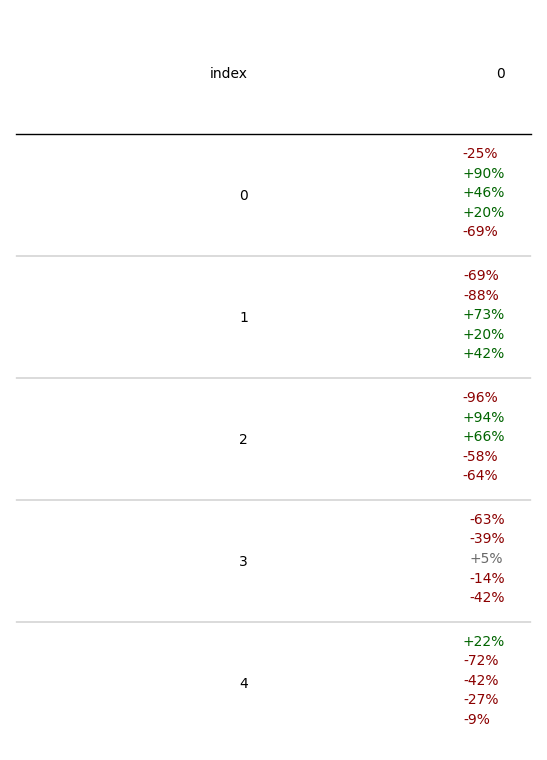

In [9]:
fig, ax = plt.subplots(figsize=(6, 8))
plt.tight_layout()
tab = Table(d.sum(axis=1).to_frame(), textprops={"ha":'right', "va":'center'})

plt.show()